# Laboration - Covid-19

## Exercise 1. Covid-19 data

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### a) Initial analyses

In [42]:
covid19 = pd.read_excel("data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name=8)
covid19 #Exploring both head and tail at once

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2021,37,6266,60,137,1145764,11039,24,7823,52,5.0,14807,1426.599976
85,2021,38,4298,41,101,1150062,11080,21,7844,40,3.9,14847,1430.400024
86,2021,39,4241,41,82,1154303,11121,17,7861,37,3.6,14884,1434.000000
87,2021,40,4141,40,81,1158444,11161,15,7876,42,4.0,14926,1438.099976


In [43]:
#There are no missing values (89 rows/weeks and 89 non-null values).
#The data type is either int64 or float64 and seems to be appropriately used.
covid19.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              89 non-null     int64  
 1   veckonummer                     89 non-null     int64  
 2   Antal_fall_vecka                89 non-null     int64  
 3   Antal_fall_100000inv_vecka      89 non-null     int64  
 4   Antal_fall_100000inv_14dagar    89 non-null     int64  
 5   Kum_antal_fall                  89 non-null     int64  
 6   Kum_fall_100000inv              89 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  89 non-null     int64  
 8   Kum_antal_intensivvårdade       89 non-null     int64  
 9   Antal_avlidna_vecka             89 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    89 non-null     float64
 11  Kum_antal_avlidna               89 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      89 non

In [45]:
covid19.describe() #Generate descriptive statistics

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,89.000000,89.000000,89.000000,89.000000,89.000000,8.900000e+01,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,2020.460674,25.584270,13061.865169,126.011236,251.584270,4.885261e+05,4709.325843,88.606742,4261.741573,167.910112,16.233708,8923.303371,860.923595
std,0.501275,13.713637,14210.652869,137.184472,272.989003,4.559136e+05,4391.041264,83.646662,2609.965149,204.302952,19.765609,5126.703711,493.286226
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,2179.000000,21.000000,46.000000,7.279100e+04,705.000000,14.000000,2491.000000,17.000000,1.600000,5621.000000,544.299988
50%,2020.000000,25.000000,4608.000000,44.000000,100.000000,3.380260e+05,3273.000000,59.000000,3638.000000,82.000000,7.900000,8135.000000,787.700012
75%,2021.000000,36.000000,25405.000000,246.000000,485.000000,1.044862e+06,10067.000000,153.000000,7348.000000,235.000000,22.799999,14416.000000,1388.900024
max,2021.000000,53.000000,46177.000000,447.000000,869.000000,1.162506e+06,11200.000000,289.000000,7886.000000,664.000000,64.300003,14944.000000,1439.800049


In [46]:
covid19["år"].value_counts() #The data includes 48 weeks from 2020 and 41 weeks for 2021

2020    48
2021    41
Name: år, dtype: int64

### b) Create a "Vecka" column

In [47]:
covid19["veckonummer"] = covid19["år"].astype(str) + "v" + covid19["veckonummer"].astype(str) #Creates a new column with year and week number and overwrites the "veckonummer" column
covid19 = covid19.rename({"veckonummer":"Vecka"}, axis=1).drop("år", axis=1) #Renames the "veckonummer" column to "Vecka" and drops the year column

covid19.head()

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.0


### c-f) Plot statistics

- Deceased per week
- New cases per week
- Deceased and new cases per week
- Cumulative cases

In [48]:
#Check maximum values (to be able to set the ticks for the y-axis)
print(f"Max antal fall per vecka: {covid19['Antal_fall_vecka'].max()}")
print(f"Max antal avlidna per vecka: {covid19['Antal_avlidna_vecka'].max()}")
print(f"Max kumulativt antal fall per vecka: {covid19['Kum_antal_fall'].max()}")

Max antal fall per vecka: 46177
Max antal avlidna per vecka: 664
Max kumulativt antal fall per vecka: 1162506


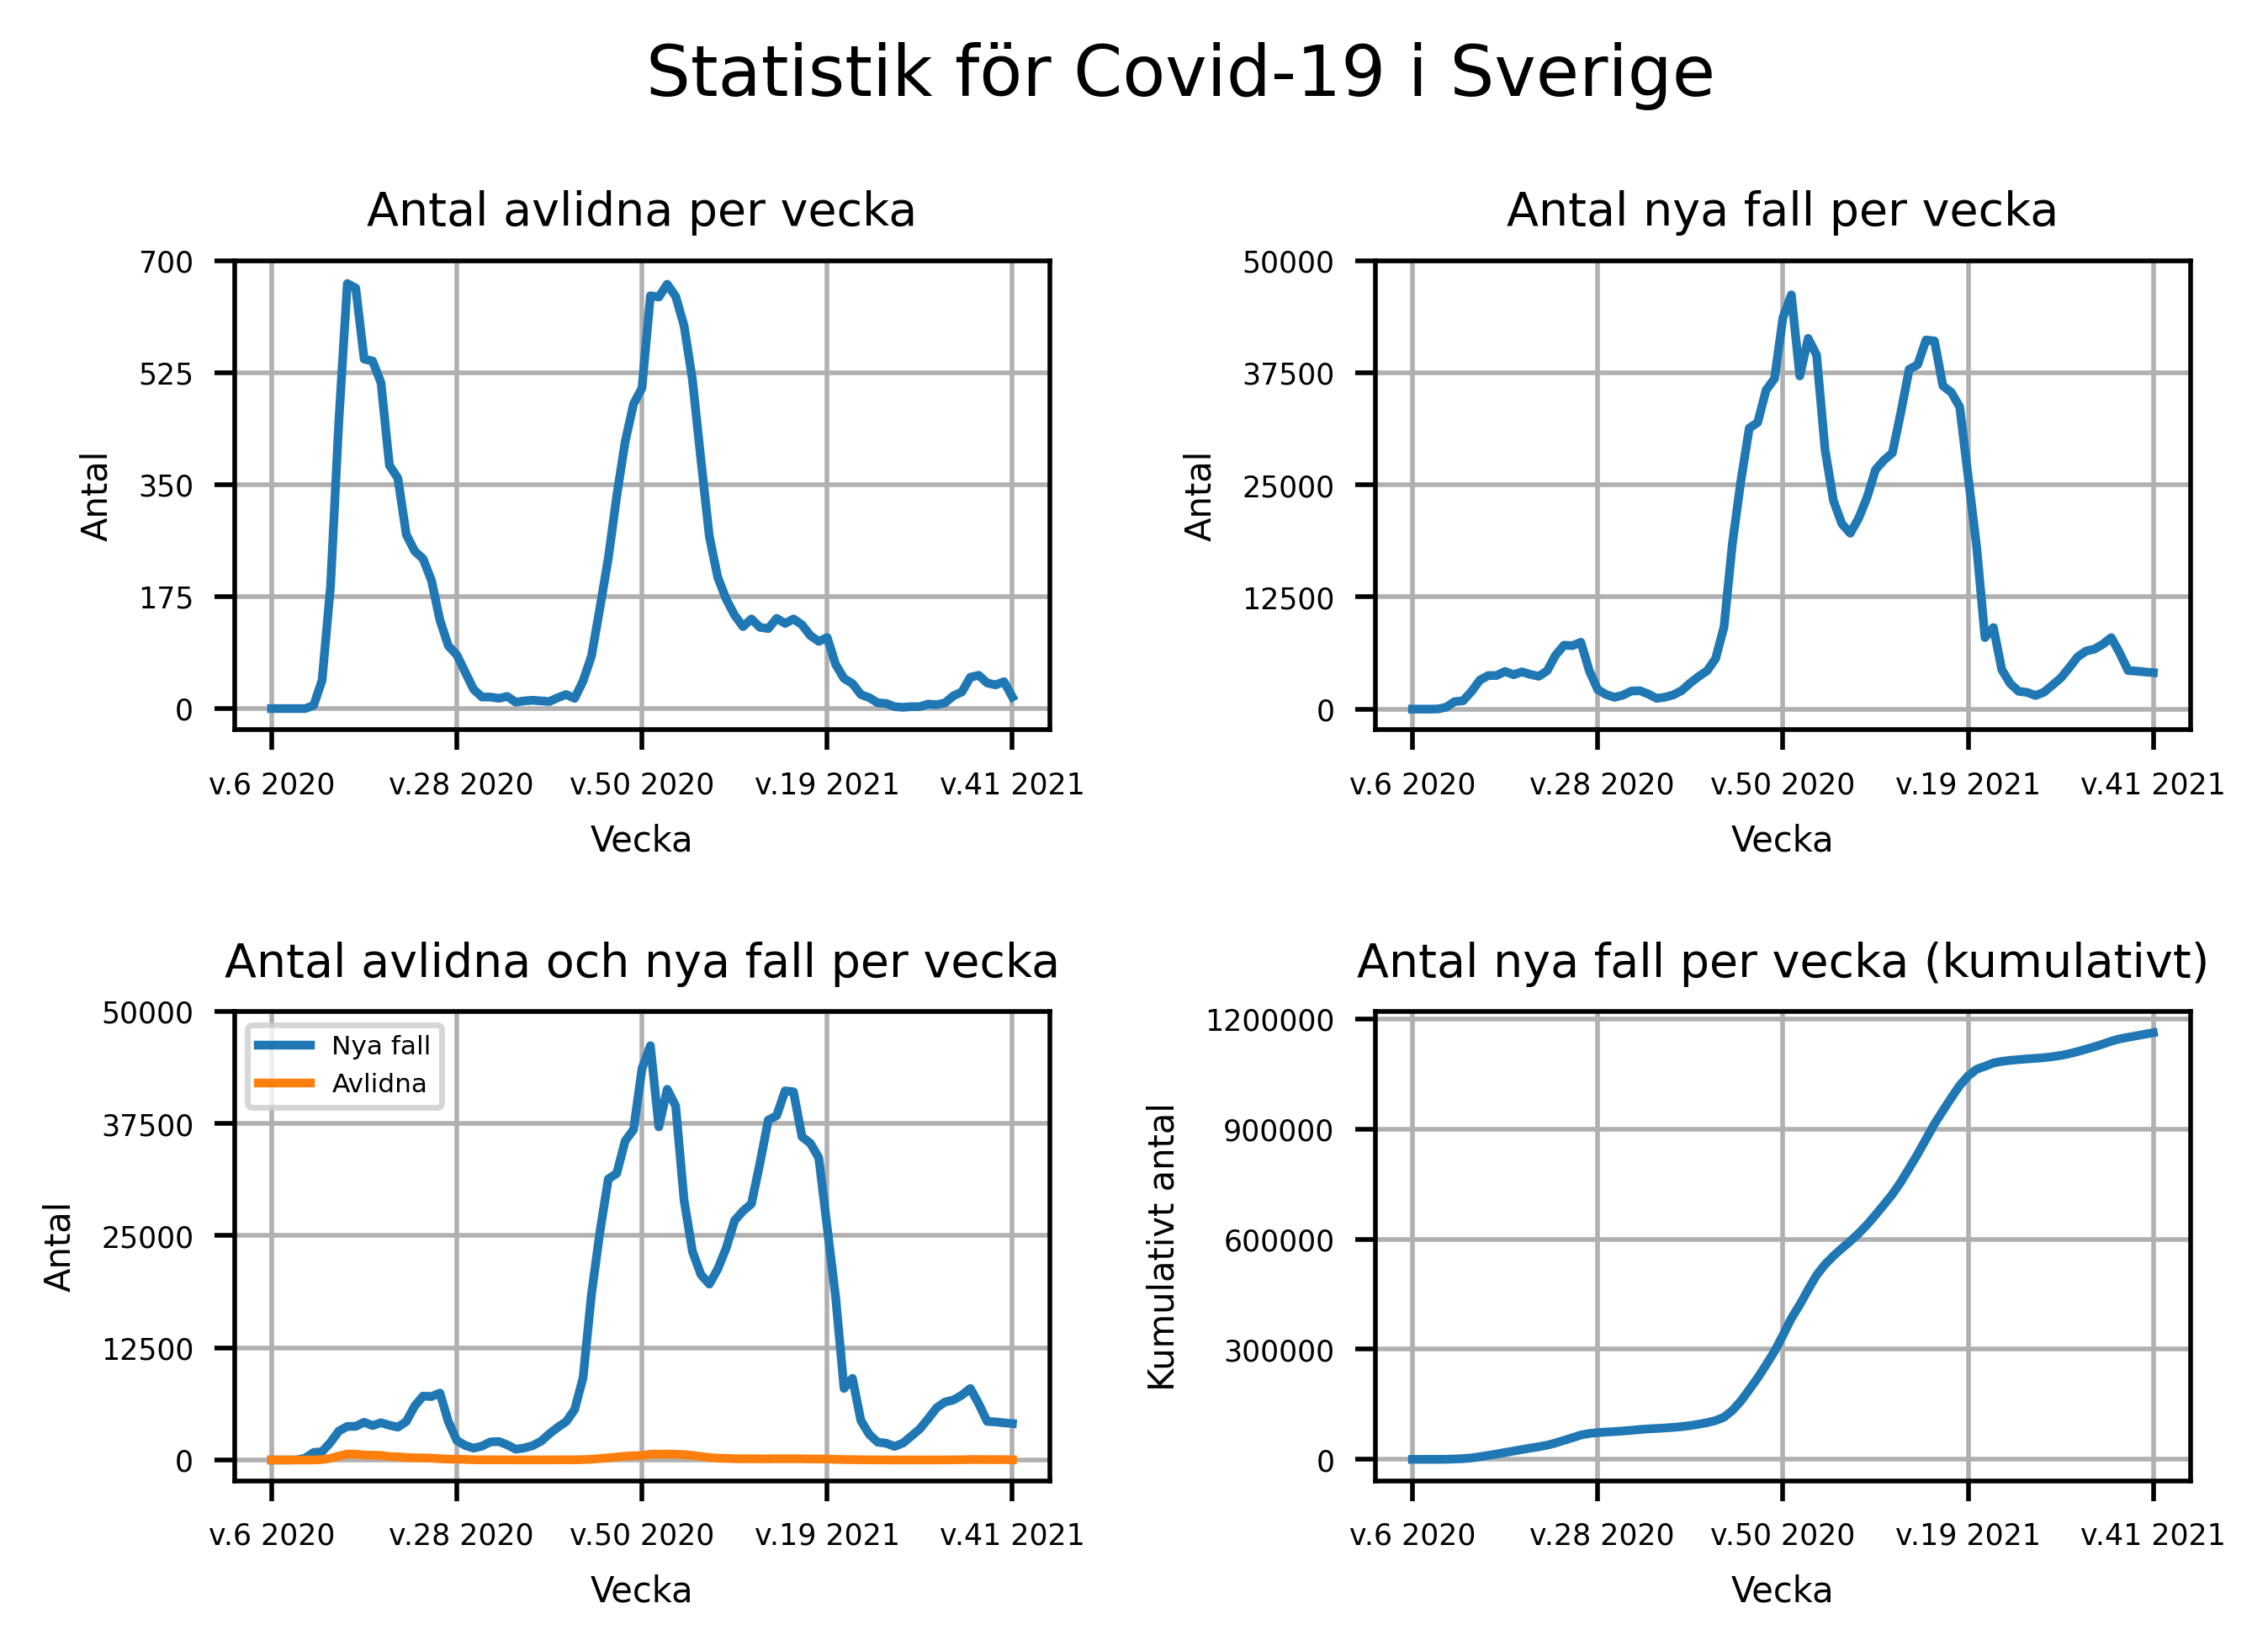

In [53]:
def set_plot_properties_seaborn(plot:sns.lineplot, title:str, y_label:str, y_tick_values:list) -> None:
    '''
    Sets the title, adjusts the ticks and changes the labels for the x and y-axis for a seaborn plot.
    
    Parameters
    ----------
    plot:sns.lineplot
        A seaborn lineplot, with weeks between wk 6 2020 and wk 41 2021.
    title:str
        The title of the plot
    y_label:str
        The label of the y-axis.
    y_tick_values:list
        The tick values for the y-axis.
    '''

    plot.set_title(title, size=8)
    plot.set_xticks([0, 22, 44, 66, 88])
    plot.set_xticklabels(["v.6 2020", " v.28 2020", "v.50 2020", "v.19 2021", "v.41 2021"], size=5)
    plot.set_yticks(y_tick_values)
    plot.set_yticklabels(labels=plot.get_yticks().astype(int), size=5)
    plot.set_xlabel("Vecka", size=6)
    plot.set_ylabel(y_label, size=6)
    plot.grid()
    
#Creates the figure for the subplots
fig, ax = plt.subplots(2,2, dpi=500, facecolor="white")
fig.subplots_adjust(wspace= .4, hspace=.6, top=.85) #Sets the space between plots and the space on top of the plot.
fig.suptitle("Statistik för Covid-19 i Sverige")

#Plots the first subplot
plot1 = sns.lineplot(data=covid19, x="Vecka", y="Antal_avlidna_vecka", ax=ax[0,0])
set_plot_properties_seaborn(plot1,"Antal avlidna per vecka", "Antal", [0, 175, 350, 525, 700])

#Plots the second subplot
plot2 = sns.lineplot(data=covid19, x="Vecka", y="Antal_fall_vecka", ax=ax[0,1])
set_plot_properties_seaborn(plot2, "Antal nya fall per vecka", "Antal", [0, 12500, 25000, 37500, 50000])

#Plots the third subplot
plot3 = sns.lineplot(data=covid19, x="Vecka", y="Antal_fall_vecka", ax=ax[1,0])
plot3 = sns.lineplot(data=covid19, x="Vecka", y="Antal_avlidna_vecka", ax=ax[1,0])
plot3.legend(labels=["Nya fall", "Avlidna"], fontsize=4.5, loc="upper left")
set_plot_properties_seaborn(plot3, "Antal avlidna och nya fall per vecka", "Antal", [0, 12500, 25000, 37500, 50000])

#Plots the forth subplot
plot4 = sns.lineplot(data=covid19, x="Vecka", y="Kum_antal_fall", ax=ax[1,1])
set_plot_properties_seaborn(plot4, "Antal nya fall per vecka (kumulativt)", "Kumulativt antal", [0, 300000, 600000, 900000, 1200000])

plt.savefig("Visualiseringar/Statistics_for_Covid-19_in_Sweden.png")

In [ ]:
def create_plotly_linefig(y_data1:str, y_label:str, title:str, y_data2:str=None, y_data1_legend_label:str=None, y_data2_legend_label:str=None) -> px.line:
        """
        Creates a plotly express line plot from the covid19 dataset.
        
        Parameters
        ----------
        y_data1:str
                The name of the first column to be plotted on the y-axis.
        y_label:str
                The label on the y-axis.
        title:str
                The title of the plot.
        y_data2:str
                The name of the second column to be plotted on the y-axis (default None).
        y_data1_legend_label:str
                The name of the first y-data, to be shown in the legend (default None).
        y_data2_legend_label:str
                The name of the first y-data, to be shown in the legend (default None).     
        
        Returns
        -------
        A plotly express lineplot figure.
        """

        #Creates a list of labels for the ticks (every other week)
        tick_labels = [f"v.{i} 2020" for i in range(6, 54, 2)]
        tick_labels.extend([f"v.{i} 2021" for i in range(1, 42, 2)])

        #Creates a list of the real values (every other week)
        real_labels = [f"2020v{i}" for i in range(6, 54, 2)]
        real_labels.extend([f"2021v{i}" for i in range(1, 42, 2)])

        #Creates labels for hover (all weeks)
        hover_labels = [f"v.{i} 2020" for i in range(6, 54)]
        hover_labels.extend([f"v.{i} 2021" for i in range(1, 42)])

        #Creates a template to be used in the hover (used in update_traces)
        hover_template = '<br>%{customdata}<br>Antal personer: %{y}<br><extra></extra>' #<extra></extra> removes the secondary box
        
        #Creates the figure
        if y_data2 == None:
                fig = px.line(covid19, x="Vecka", y=y_data1, title=title)
                fig.update_layout(showlegend=False) #Removes the legend
        else:
                fig = px.line(
                        covid19, 
                        x="Vecka",      
                        y=[y_data1, y_data2],
                        title=title,
                        hover_data={"Vecka":False, y_data1:False, y_data2:False} #Removes all information about the data from the hover/legend
                        )
                #Adds the two lines in one plot and sets a name that will be shown in the legend.
                fig.add_trace(go.Scatter(x=covid19["Vecka"], y=covid19[y_data1], name=y_data1_legend_label))
                fig.add_trace(go.Scatter(x=covid19["Vecka"], y=covid19[y_data2], name=y_data2_legend_label))

        #Customise hover
        fig.update_traces(customdata=hover_labels, hovertemplate=hover_template, mode="markers+lines") #hover_labels is assigned to customdata, so that it can be used in the hovertemplate

        #Sets the label of the y-axis and the ticks for the x-axis
        fig.update_layout(
                yaxis=dict(title=y_label),
                xaxis = dict(tickmode = 'array', 
                        tick0 = 0, 
                        dtick = 2, #Show every other tick/week
                        ticktext=tick_labels, #The tick_labels (created above) should be shown
                        tickvals=real_labels #These are the old values that should be overwritten in the plot
                        ))

        return fig

In [ ]:
#TODO: Check how to save it in html
plot1 = create_plotly_linefig("Antal_avlidna_vecka", "Antal", "Avlidna i Covid-19 i Sverige (per vecka)")
plot1.show()
plot1.write_html("Visualiseringar/deceased_per_week.html", auto_open=True)

In [ ]:
plot2 = create_plotly_linefig("Antal_fall_vecka", "Antal", "Nya fall av Covid-19 i Sverige (per vecka)")
plot2.show()
plot2.write_html("Visualiseringar/new_cases.html", auto_open=True)

In [ ]:
plot3 = create_plotly_linefig("Antal_avlidna_vecka", "Antal", "Avlidna och nya fall av Covid-19 i Sverige (per vecka)", "Antal_fall_vecka", "Avlidna", "Nya fall")
plot3.show()
plot3.write_html("Visualiseringar/deceased_and_new_cases.html", auto_open=True)

In [ ]:
plot4 = create_plotly_linefig("Kum_antal_fall", "Kumulativt antal", "Antal nya fall i Sverige per vecka (kumulativt)")
plot4.show()
plot4.write_html("Visualiseringar/cumulative_cases.html", auto_open=True)

## Exercise 2. Vaccination Data

In [28]:
vaccination = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name=5)
vaccination

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal färdigvaccinerade,Andel minst 1 dos,Andel färdigvaccinerade
0,1,Stockholm,114,Upplands Väsby,16-17,1122,671,450,0.598039,0.401070
1,1,Stockholm,114,Upplands Väsby,18-29,6428,4174,3324,0.649347,0.517113
2,1,Stockholm,114,Upplands Väsby,30-39,7088,4976,4341,0.702032,0.612444
3,1,Stockholm,114,Upplands Väsby,40-49,6802,5308,5010,0.780359,0.736548
4,1,Stockholm,114,Upplands Väsby,50-59,6185,5360,5190,0.866613,0.839127
...,...,...,...,...,...,...,...,...,...,...
2605,25,Norrbotten,2584,Kiruna,50-59,3134,2911,2852,0.928845,0.910019
2606,25,Norrbotten,2584,Kiruna,60-69,2768,2596,2537,0.937861,0.916546
2607,25,Norrbotten,2584,Kiruna,70-79,2287,2160,2074,0.944469,0.906865
2608,25,Norrbotten,2584,Kiruna,80-89,1280,1233,1157,0.963281,0.903906


### a) Number of "län" in the data

In [ ]:
print(f"There are {len(vaccination['Län_namn'].unique())} 'län' in the dataset.")

### b) Number of "kommuner" in the dataset.

In [ ]:
print(f"There are {len(vaccination['Kommun_namn'].unique())} 'kommuner' in the dataset.")

### c) Number of people that are are represented in the data.

In [ ]:
no_people_represented = sum(vaccination['Befolkning'])
print(f"There are {no_people_represented} people represented in the data")

### d) Number of children, under the age of 16.

In [ ]:
print(f"There are about {10427296-no_people_represented} children (under the age of 16) in Sweden.") 

### e) Bar chart for number of people vaccinated with at least one dose and fully vaccinated people (two plots)

In [ ]:
#Creates a new dataframe to be used for plotting vaccination for each "län"
vaccination_summed = pd.DataFrame(vaccination["Antal färdigvaccinerade"].groupby(vaccination["Län_namn"]).sum())
vaccination_summed["Antal minst 1 dos"] = vaccination["Antal minst 1 dos"].groupby(vaccination["Län_namn"]).sum()
vaccination_summed["Andel färdigvaccinerade"] = vaccination["Andel färdigvaccinerade"].groupby(vaccination["Län_namn"]).mean()*100
vaccination_summed["Andel minst 1 dos"] = vaccination["Andel minst 1 dos"].groupby(vaccination["Län_namn"]).mean()*100
vaccination_summed

In [ ]:
#Creates a template to be shown in hover
def create_plotly_barfig(y_data1:str, title:str, y_data2:str=None) -> px.bar:
        """
        Creates a plotly express bar plot from the vaccination dataset.
        
        Parameters
        ----------
        y_data1:str
                The name of the first column to be plotted on the y-axis.
        title:str
                The title of the plot.
        y_data2:str
                The name of the second column to be plotted on the y-axis (default None).    
        
        Returns
        -------
        A plotly express barplot figure.
        """        

        if y_data2 == None:
                fig = px.bar(
                        vaccination_summed, 
                        x=vaccination_summed.index,      
                        y=y_data1,
                        title=title,
                        labels={"Län_namn":"Län"}
                        )
        else:
                fig = px.bar(
                        vaccination_summed, 
                        x=vaccination_summed.index, 
                        y=[y_data1, y_data2], 
                        barmode="group",
                        title=title,
                        labels={"Län_namn":"Län", "value":"Antal vaccinerade", "variable":"Variabel"}
                        )
        if y_data1 == "Andel minst 1 dos" or y_data1 == "Andel färdigvaccinerade":
                fig.update_layout(
                        yaxis=dict(title="Andel (%)"), 
                        xaxis=dict(title="Län"),
                        )
        else:
                fig.update_layout(
                        yaxis=dict(title="Antal"), 
                        xaxis=dict(title="Län"),
                        )

        return fig      

In [ ]:
plot5 = create_plotly_barfig("Andel minst 1 dos", "Andel vaccinerade med minst en dos (per län)")
plot5.show()

In [ ]:
plot6 = create_plotly_barfig("Andel färdigvaccinerade", "Andel färdigvaccinerade (per län)")
plot6.show()

### f) Bar chart for number of people vaccinated with at least one dose and fully vaccinated people (one plot)

In [ ]:
plot7 = create_plotly_barfig("Antal minst 1 dos", "Antal vaccinerade med minst en dos och antal färdigvaccinerade", "Antal färdigvaccinerade")
plot7.show()

TODO: Save all the plots to html and rename them

## Exercise 3. KPI

I have identified the following six KPI:s (where all, except the last one, are on a national level):
1. The number of deceased should decrease when the number of vaccinated people increase.
2. The number of covid-19 cases should decrease when the number of vaccinated people increase.
3. The number of people in intensive care units should decrease when the number of vaccinated people increase.
4. The majority of people receiving their first dose should also receive their second dose.
5. The vaccination distribution order should generally be followed (i.e. from the oldest to the youngest).
6. The number of covid-19 cases (per 10,000 inhabitants) should not differ significantly between the different neighbourhoods in Gothenburg.

### KPI 1. The number of deceased should decrease when the number of vaccinated people increase

- One of the main goals with vaccination is that the vaccination should decrease the death rate. This is the first KPI I have identified. I will examine this exploratory, by plotting the relationship between the number of deceased and the number of vaccinated people.
- However, I first start with reading in the data and creating a new dataframe.

In [64]:
vaccination_swe = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name=0)
vaccination_swe #"Antal vaccinationer" is cumulatative

,Vecka,År,Region,Antal vaccinationer
0,52,2020,| Sverige |,2472
1,52,2020,Stockholm,288
2,52,2020,Uppsala,8
3,52,2020,Södermanland,116
4,52,2020,Östergötland,214
...,...,...,...,...
941,41,2021,Gävleborg,400931
942,41,2021,Västernorrland,353992
943,41,2021,Jämtland,187873
944,41,2021,Västerbotten,403377


In [65]:
vaccination_swe.info() #No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Vecka                946 non-null    int64 
 1   År                   946 non-null    int64 
 2   Region               946 non-null    object
 3   Antal vaccinationer  946 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 29.7+ KB


In [66]:
#Create a "Vecka" column and overwrite/drop the old values
vaccination_swe["Vecka"] = "v." + vaccination_swe["Vecka"].astype(str) + " " + vaccination_swe["År"].astype(str) 
vaccination_swe = vaccination_swe.drop("År", axis=1) 
vaccination_swe

,Vecka,Region,Antal vaccinationer
0,v.52 2020,| Sverige |,2472
1,v.52 2020,Stockholm,288
2,v.52 2020,Uppsala,8
3,v.52 2020,Södermanland,116
4,v.52 2020,Östergötland,214
...,...,...,...
941,v.41 2021,Gävleborg,400931
942,v.41 2021,Västernorrland,353992
943,v.41 2021,Jämtland,187873
944,v.41 2021,Västerbotten,403377


In [67]:
#Pick out Sweden from region and remove the region column
vaccination_swe = vaccination_swe.loc[(vaccination_swe["Region"] == "| Sverige |")].reset_index(drop=True)
vaccination_swe = vaccination_swe.drop(labels="Region", axis=1)
vaccination_swe.head()

,Vecka,Antal vaccinationer
0,v.52 2020,2472
1,v.53 2020,16529
2,v.1 2021,52934
3,v.2 2021,132235
4,v.3 2021,244991


In [68]:
covid19_to_merge = pd.read_excel("data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name=8)
covid19_to_merge["veckonummer"] = "v." + covid19_to_merge["veckonummer"].astype(str) + " " + covid19_to_merge["år"].astype(str)
covid19_to_merge = covid19_to_merge.rename({"veckonummer":"Vecka"}, axis=1).drop("år", axis=1)
covid19_to_merge.head()

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,v.6 2020,1,0,0,1,0,0,0,0,0.0,0,0.0
1,v.7 2020,0,0,0,1,0,0,0,0,0.0,0,0.0
2,v.8 2020,0,0,0,1,0,0,0,0,0.0,0,0.0
3,v.9 2020,13,0,0,14,0,0,0,0,0.0,0,0.0
4,v.10 2020,211,2,2,225,2,3,3,0,0.0,0,0.0


In [69]:
covid19_vaccination_merged = pd.merge(vaccination_swe, covid19_to_merge[["Vecka", "Antal_fall_vecka", "Antal_nyaintensivvårdade_vecka", "Antal_avlidna_vecka"]], on="Vecka", how="left")
covid19_vaccination_merged.head()

,Vecka,Antal vaccinationer,Antal_fall_vecka,Antal_nyaintensivvårdade_vecka,Antal_avlidna_vecka
0,v.52 2020,2472,37134,206,643
1,v.53 2020,16529,41323,234,663
2,v.1 2021,52934,39455,185,644
3,v.2 2021,132235,28942,153,598
4,v.3 2021,244991,23230,125,513


In [70]:
covid19_vaccination_merged.tail()

,Vecka,Antal vaccinationer,Antal_fall_vecka,Antal_nyaintensivvårdade_vecka,Antal_avlidna_vecka
38,v.37 2021,13397681,6266,24,52
39,v.38 2021,13581182,4298,21,40
40,v.39 2021,13734960,4241,17,37
41,v.40 2021,13876097,4141,15,42
42,v.41 2021,14066584,4062,10,18


It is now time to plot the data, and I choose to do this with a regplot, since I expect the relationship to be linear. The line shown is the regression line, with the shaded part being the 95% confident interval. 

Text(0.5, 1.0, 'Antal avlidna ')

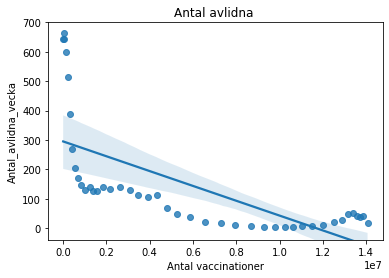

In [76]:
fig = sns.regplot(data=covid19_vaccination_merged, x="Antal vaccinationer", y="Antal_avlidna_vecka")
_ = fig.set(ylim=(-40, 700))
fig.set_title("Antal avlidna ")

In the plot above we can see that the number of people who dies from covid-19 decreases when the number of vaccinated people increases ("antal vaccinationer" is the cumulative value). The relationship is not entirely linear (although there is a linear trend), but the number of deceased decreases fastest at the beginning. This effect could be due to the fact that the first people who got vaccinated was the elderly, other people in risk groups and the people who took care of them. 

### KPI 2. The number of covid-19 cases should decrease when the number of vaccinated people increase

- We investigate this by plotting the number of vaccinations against the number of cases.


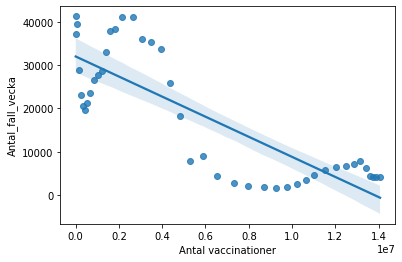

In [57]:
fig = sns.regplot(data=covid19_vaccination_merged, x="Antal vaccinationer", y="Antal_fall_vecka")

The graph above shoves a curvilinear relationship, but the trend is that the cases per week decreases when more people are vaccinated. This plot depicts the second wave of covid-19 (see data) and the number of cases are propably explained by several other factors than the number of vaccination (for example restrictions, weather etc.).

### KPI 3. The number of people in intensive care units should decrease when the number of vaccinated people increase

- We investigate this by plotting the number of vaccinations against the number of people in intensive care.

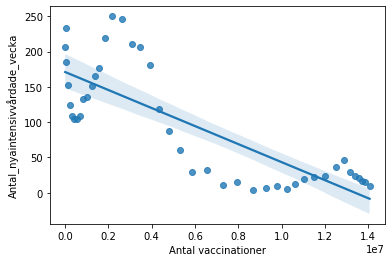

In [58]:
fig = sns.regplot(data=covid19_vaccination_merged, x="Antal vaccinationer", y="Antal_nyaintensivvårdade_vecka")

The graph above shoves a curvilinear relationship, but the trend is that the cases per week decreases when more people are vaccinated. This plot depicts the second wave of covid-19 (see data) and the number of cases are propably explained by several other factors than the number of vaccination (for example restrictions, weather etc.)

This plot shows a similar trend as the plot for the number of cases. This is interesting, since we would also expect a larger drop of the number of people in intensive care in the beginning, because people in risk groups (who got vaccinated early) are more likely to end up in intensive care if infected. However, a lot of elderly people with covid-19 died at home and were never in intensive care.

### KPI 4. The majority of people receiving their first dose should also receive their second dose.

In [54]:
vaccination_one_dose_or_fully = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name=1)

vaccination_one_dose_or_fully["Vecka"] = "v." + vaccination_one_dose_or_fully["Vecka"].astype(str) + " " + vaccination_one_dose_or_fully["År"].astype(str)
vaccination_one_dose_or_fully = vaccination_one_dose_or_fully.drop("År", axis=1)
vaccination_one_dose_or_fully 

,Vecka,Region,Antal vaccinerade,Andel vaccinerade,Vaccinationsstatus
0,v.52 2020,| Sverige |,2472,0.000289,Minst 1 dos
1,v.52 2020,| Sverige |,0,0.000000,Färdigvaccinerade
2,v.52 2020,Stockholm,288,0.000148,Minst 1 dos
3,v.52 2020,Stockholm,0,0.000000,Färdigvaccinerade
4,v.52 2020,Uppsala,8,0.000025,Minst 1 dos
...,...,...,...,...,...
1887,v.41 2021,Jämtland,90406,0.829771,Färdigvaccinerade
1888,v.41 2021,Västerbotten,206223,0.907891,Minst 1 dos
1889,v.41 2021,Västerbotten,196346,0.864408,Färdigvaccinerade
1890,v.41 2021,Norrbotten,188604,0.893312,Minst 1 dos


In [55]:
vaccination_one_dose_or_fully = vaccination_one_dose_or_fully.loc[vaccination_one_dose_or_fully["Region"] == "| Sverige |"].reset_index(drop=True)
vaccination_one_dose_or_fully

,Vecka,Region,Antal vaccinerade,Andel vaccinerade,Vaccinationsstatus
0,v.52 2020,| Sverige |,2472,2.894106e-04,Minst 1 dos
1,v.52 2020,| Sverige |,0,0.000000e+00,Färdigvaccinerade
2,v.53 2020,| Sverige |,16524,1.934556e-03,Minst 1 dos
3,v.53 2020,| Sverige |,5,5.853775e-07,Färdigvaccinerade
4,v.1 2021,| Sverige |,52923,6.195986e-03,Minst 1 dos
...,...,...,...,...,...
81,v.39 2021,| Sverige |,6565538,7.686636e-01,Färdigvaccinerade
82,v.40 2021,| Sverige |,7188487,8.415957e-01,Minst 1 dos
83,v.40 2021,| Sverige |,6673535,7.813074e-01,Färdigvaccinerade
84,v.41 2021,| Sverige |,7212619,8.444209e-01,Minst 1 dos


In [60]:
vaccination_one_dose_or_fully.iloc[43]

Vecka                         v.20 2021
Region                      | Sverige |
Antal vaccinerade               1149443
Andel vaccinerade              0.134572
Vaccinationsstatus    Färdigvaccinerade
Name: 43, dtype: object

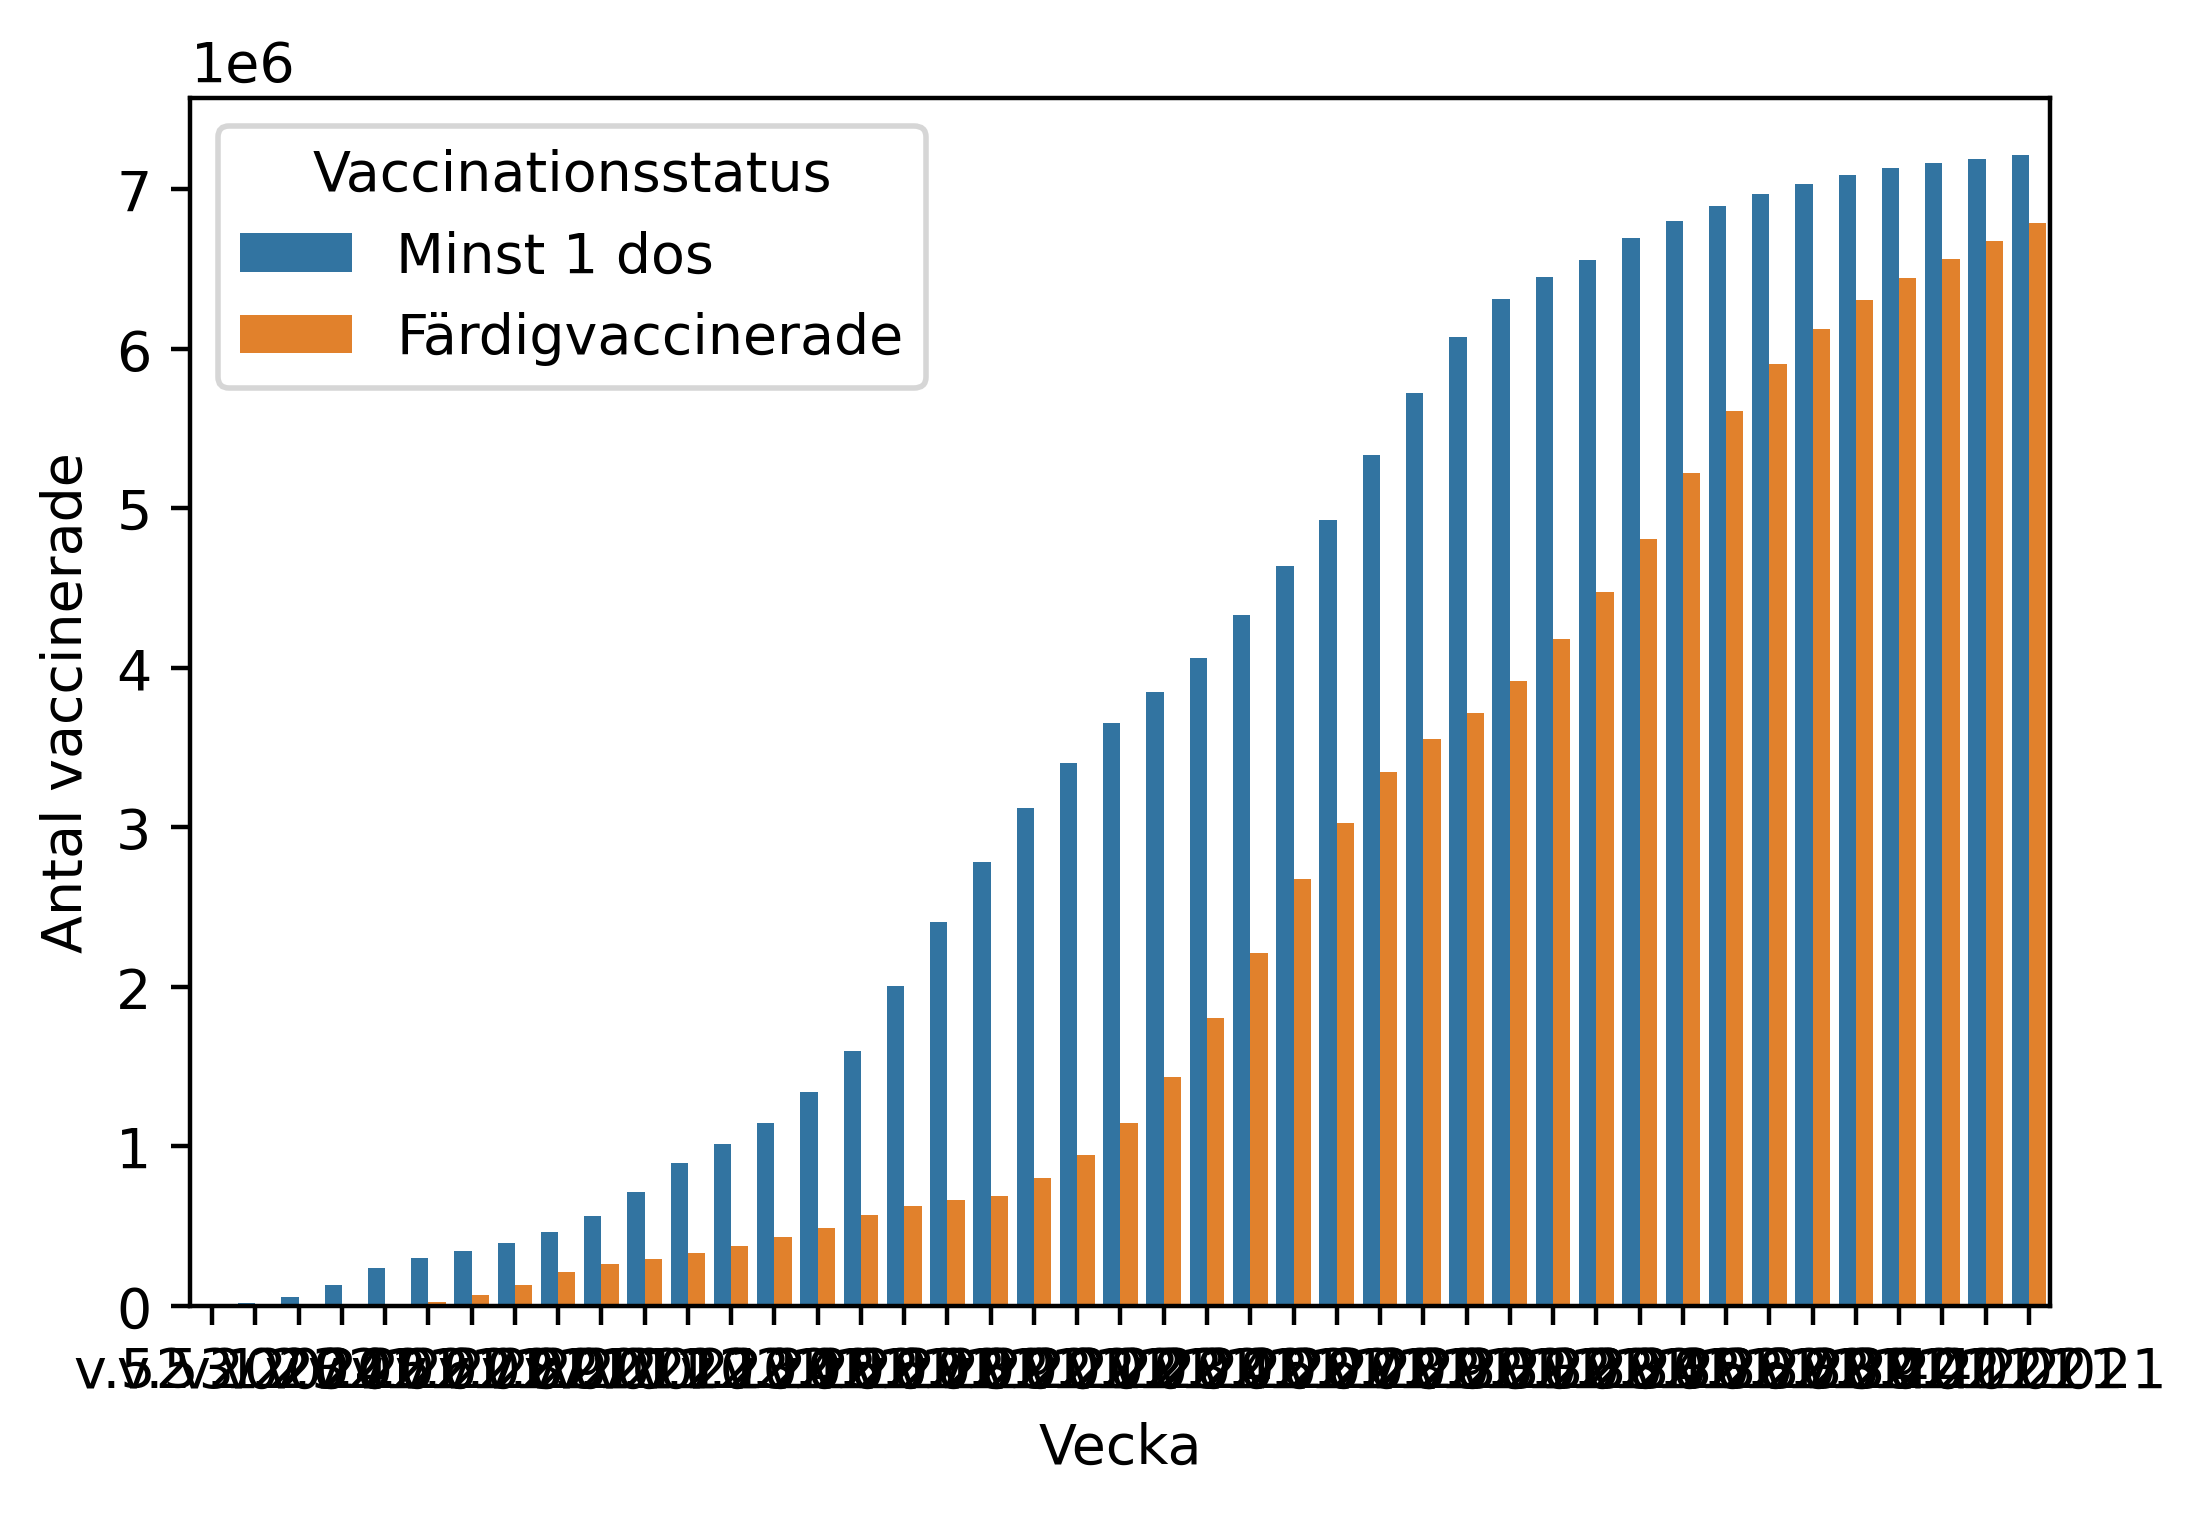

In [62]:
plt.figure(dpi=400)
plot1 = sns.barplot(data=vaccination_one_dose_or_fully, x="Vecka", y="Antal vaccinerade", hue="Vaccinationsstatus")
plot1.set_xticklabels("v52. 2020", "v.20 2021", "v.41 2021")

### KPI 5. The vaccination distribution order should generally be followed (i.e. from the oldest to the youngest).


In [24]:
vaccination_age = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name=2, usecols=[0, 1, 3, 4])
vaccination_age

,Region,Åldersgrupp,Andel vaccinerade,Vaccinationsstatus
0,| Sverige |,12-15,0.124423,Minst 1 dos
1,| Sverige |,16-17,0.697477,Minst 1 dos
2,| Sverige |,18-29,0.743473,Minst 1 dos
3,| Sverige |,30-39,0.765540,Minst 1 dos
4,| Sverige |,40-49,0.837383,Minst 1 dos
...,...,...,...,...
479,Norrbotten,60-69,0.922048,Färdigvaccinerade
480,Norrbotten,70-79,0.928667,Färdigvaccinerade
481,Norrbotten,80-89,0.907130,Färdigvaccinerade
482,Norrbotten,90 eller äldre,0.867224,Färdigvaccinerade


In [25]:
vaccination_age = vaccination_age.loc[(vaccination_age["Region"] == "| Sverige |") & (vaccination_age["Åldersgrupp"] != "Totalt")]
vaccination_age.head(11)

,Region,Åldersgrupp,Andel vaccinerade,Vaccinationsstatus
0,| Sverige |,12-15,0.124423,Minst 1 dos
1,| Sverige |,16-17,0.697477,Minst 1 dos
2,| Sverige |,18-29,0.743473,Minst 1 dos
3,| Sverige |,30-39,0.765540,Minst 1 dos
4,| Sverige |,40-49,0.837383,Minst 1 dos
5,| Sverige |,50-59,0.887705,Minst 1 dos
6,| Sverige |,60-69,0.919099,Minst 1 dos
7,| Sverige |,70-79,0.946281,Minst 1 dos
8,| Sverige |,80-89,0.945797,Minst 1 dos
9,| Sverige |,90 eller äldre,0.918751,Minst 1 dos


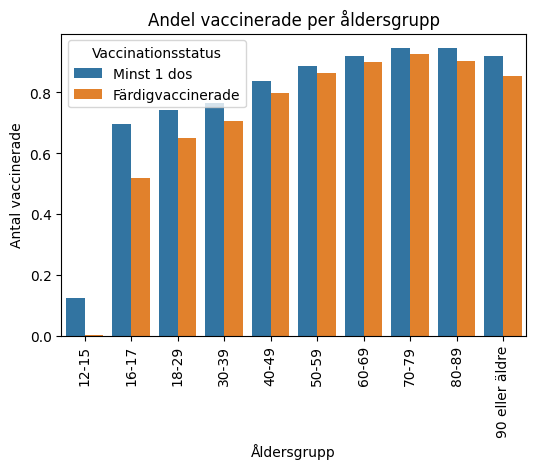

In [37]:
plt.figure(dpi=100)
plot1 = sns.barplot(data=vaccination_age, x="Åldersgrupp", y="Andel vaccinerade", hue="Vaccinationsstatus")
_ = plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
plot1.set_ylabel("Antal vaccinerade")
_ = plot1.set_title("Andel vaccinerade per åldersgrupp")

### KPI 6. The number of covid-19 cases (per 10,000 inhabitants) should not differ significantly between the different neighbourhoods in Gothenburg.

- On a more local level
- We would like to have a low spread of the virus in all of the neighbourhoods in Göteborg, and in the best of worlds, it should not matter in which neighbourhood we live in. 


In [10]:
number_cases_neighbourhood = pd.read_excel("data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name=7, usecols=[0, 1, 3, 4, 6])
number_cases_neighbourhood

,år,veckonummer,KnNamn,Stadsdel,tot_antal_fall_per10000inv
0,2020,1,Ale,NaN,0.0
1,2020,2,Ale,NaN,0.0
2,2020,3,Ale,NaN,0.0
3,2020,4,Ale,NaN,0.0
4,2020,5,Ale,NaN,0.0
...,...,...,...,...,...
30169,2021,37,Övertorneå,NaN,550.0
30170,2021,38,Övertorneå,NaN,555.0
30171,2021,39,Övertorneå,NaN,555.0
30172,2021,40,Övertorneå,NaN,557.0


In [105]:
number_cases_neighbourhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30174 entries, 0 to 30173
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   år                          30174 non-null  int64  
 1   veckonummer                 30174 non-null  int64  
 2   KnNamn                      30174 non-null  object 
 3   Stadsdel                    3196 non-null   object 
 4   tot_antal_fall_per10000inv  27802 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


In [11]:
number_cases_neighbourhood = number_cases_neighbourhood.loc[(number_cases_neighbourhood["KnNamn"] == "Göteborg") 
                            & (number_cases_neighbourhood["veckonummer"] == 41) & 
                            (number_cases_neighbourhood["år"] == 2021)].reset_index(drop=True)
number_cases_neighbourhood 

,år,veckonummer,KnNamn,Stadsdel,tot_antal_fall_per10000inv
0,2021,41,Göteborg,Angered,1311.0
1,2021,41,Göteborg,Askim-Frölunda-Högsbo,1250.0
2,2021,41,Göteborg,Centrum,1220.0
3,2021,41,Göteborg,Lundby,1261.0
4,2021,41,Göteborg,Majorna-Linné,1291.0
5,2021,41,Göteborg,Norra Hisingen,1329.0
6,2021,41,Göteborg,Västra Göteborg,1340.0
7,2021,41,Göteborg,Västra Hisingen,1319.0
8,2021,41,Göteborg,Örgryte-Härlanda,1331.0
9,2021,41,Göteborg,Östra Göteborg,1249.0


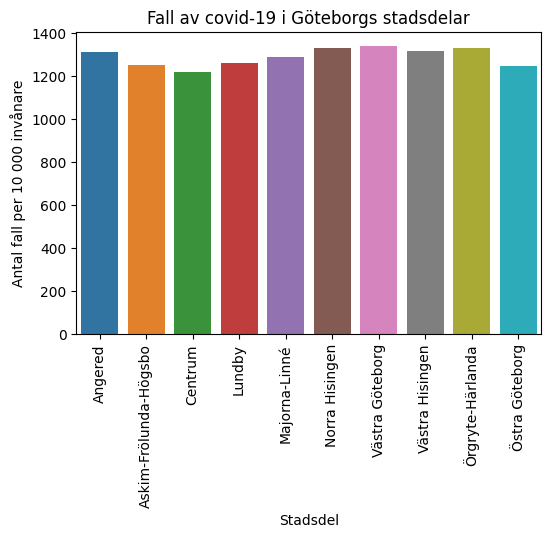

In [16]:
plt.figure(dpi=100)
plot1 = sns.barplot(data=number_cases_neighbourhood, x="Stadsdel", y="tot_antal_fall_per10000inv")
_ = plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
plot1.set_ylabel("Antal fall per 10 000 invånare")
_ = plot1.set_title("Fall av covid-19 i Göteborgs stadsdelar")